In [8]:
#importing the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [9]:
customer_data = pd.read_csv('CC_Kmeans.xls')
customer_data

,CustomerID,Gender,Age,Annual Income (k rupees),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
...,...,...,...,...,...
1195,NaN,Female,35.0,120.0,79.0
1196,NaN,Female,45.0,126.0,28.0
1197,NaN,Male,32.0,126.0,74.0
1198,NaN,Male,32.0,137.0,18.0


In [10]:
import os
print(os.getcwd())


d:\DS Community_Task\BASIC_Clustering


In [11]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k rupees),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


In [12]:
customer_data.shape

(1200, 5)

In [13]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                203 non-null    float64
 1   Gender                    1199 non-null   object 
 2   Age                       1199 non-null   float64
 3   Annual Income (k rupees)  1199 non-null   float64
 4   Spending Score (1-100)    1199 non-null   float64
dtypes: float64(4), object(1)
memory usage: 47.0+ KB


In [14]:
customer_data.isnull().sum()

CustomerID                  997
Gender                        1
Age                           1
Annual Income (k rupees)      1
Spending Score (1-100)        1
dtype: int64

In [15]:
#Choosing the Annual Income Column & Spending Score column
X = customer_data.iloc[:,[3,4]].values

In [16]:
print(X)

[[ 15.  39.]
 [ 15.  81.]
 [ 16.   6.]
 ...
 [126.  74.]
 [137.  18.]
 [137.  83.]]


In [17]:

X = X[~np.isnan(X).any(axis=1)]
# finding wcss value for different number of clusters using WCSS -> Within Clusters Sum of Squares

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

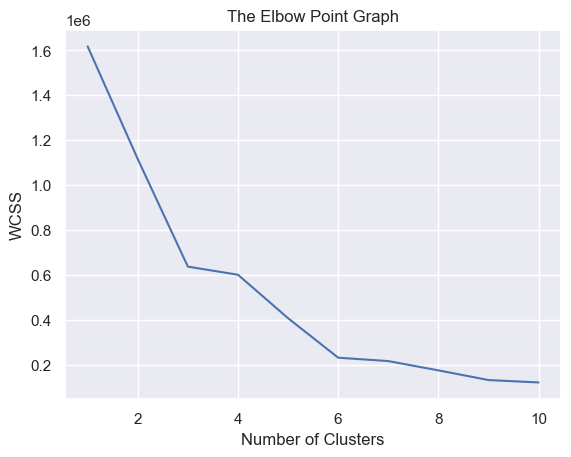

In [18]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Training the k-Means Clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 ... 1 2 1]


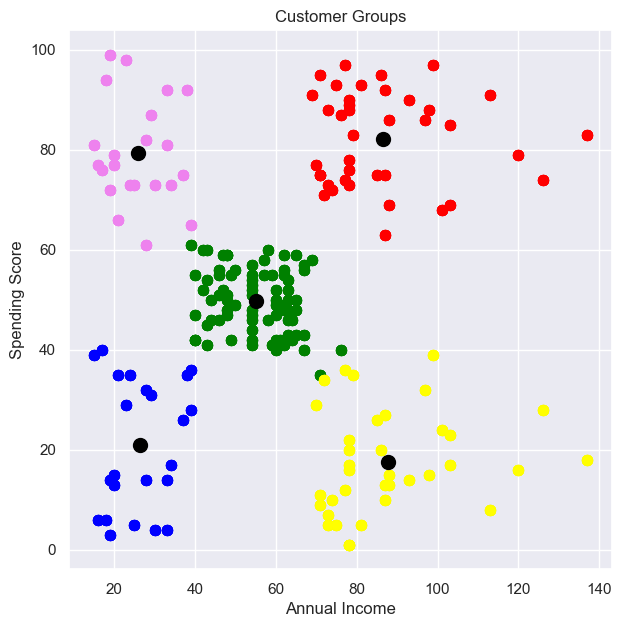

In [20]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(7,7))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()